# Chaines de Markov et épidémiologie :
## propagation d’une épidémie dans une population

### Packages :

In [2]:
# Les packages random et matplotlib sont conseillés.
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import copy, deepcopy
from collections import Counter

## 1 Description du modèle

#### 1. Créez la matrice de transition A, la matrice contenant les probabilités de transition entre les différents états. Vérifiez que cette matrice est stochastique

In [10]:
# A la matrice de transition 
# P(2,2) = 1 ; P(0,1) = 0.08 ; P(0,0) = 0.92 ; P(1,1) = 0.93 ; P(1,2) = 0.07 ; P(0,2) = P(1,0) = P(2,0) = P(2,1) = 0
# Avec: P -> la proba ; 0 -> l'etat S ; 1 -> l'etat I ; 2 -> l'etat R
A = np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
print(A)


[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


C'est une matrice carrée (1)

0.92 + 0.08 + 0 = 0 + 0.93 + 0.07 = 0 + 0 + 1 = 1 

Alors la somme de chaque ligne vaut 1 (2) 

Donc  d'après (1) et (2) cette matrice est stochastique

#### 2. Créez Π0 la distribution de probabilité initiale.

In [5]:
P_s = 0.9 # Un individu a une probabilité de 0.9 d’être sain
P_i = 0.1 # 0.1 d’être infecté
P_r = 0 # Alors une probabilité de 0 qu'il soit guéri
pi0 = [P_s, P_i, P_r] # Distribution de la probabilité initale
print(pi0)

[0.9, 0.1, 0]


### Tirage aléatoire des états

In [6]:
def picker(p, list_AZ,list_SZ):
    
    
    repetitions = Counter(list_SZ) #un dictionnaire où nous mettons les valeurs de la liste avec leurs repetitions 
    # Exemple : [0.5 0.5 0] -> {0.5 : 2 , 0 : 1}
    # Nous applicons ca sur la liste sans les zeros pour des raisons de facilité de calcul et d'optimisation

    minimum = min(list_SZ) # Le minimum de la liste sans les zeros 
                            # afin que nous prenons pas les 0 mais la valeur qui est juste supérieur 
    
    
    list_min = [cpt for cpt, n in enumerate(list_AZ) if n == minimum] # Nous mettons toutes ses positions dans une liste 

    if (p > 0) and (p <= (minimum * 100)) : # Exemple [0.91 0.08 0.01] P devra etre entre 0 et 0.01*100=10%
        if repetitions[minimum] > 1 : # Si la valeur existe plus qu'une fois dans la liste
            index = list_min[0] # Nous prenons la premiere position vu que c'est la premiere fois que nous voyons la valeur
        else :    
            index = list_AZ.index(minimum) # Sinon nous prenons directement l'indice de la valeur vu que la fonction index
                                            # prend que la premiere position de la valeur dans la liste
        return index 
        
    list_SZ.remove(minimum) # Il faut enlever la valeur de la liste sans les 0
    minimum2 = min(list_SZ) # pour trouver le nouveau minimum
    
    
    list_min2 = [cpt for cpt, n in enumerate(list_AZ) if n == minimum2]
    
    if (p > minimum) and (p <= (minimum * 100 + minimum2 * 100)) :
        if repetitions[minimum2] > 1 : 
            if list_min2 == list_min : 
                index = list_min[1] # maintenant si nous voyons la valeur pour la deuxieme fois nous prenons 
                                    # sa deuxième position
            # Et ainsi de suite pour le reste du code de cette fonction, le reste suit le meme logique .
            else :
                index = list_min2[0]   
        else :
            index = list_AZ.index(minimum2)
        return index
        
    list_SZ.remove(minimum2)
    reste = list_SZ[0]
    
    list_reste = [cpt for cpt, n in enumerate(list_AZ) if n == reste]
    
    if (p > (minimum * 100 + minimum2 * 100)) and (p <= 100) :
        if repetitions[reste] > 1 : 
            if list_reste == list_min2 :
                if  list_min2 != list_min : 
                    index = list_min2[1]
                else :
                    index = list_min2[2]
            elif liste_reste == liste_min :
                if liste_min != liste_min2 :
                    index = liste_min[1]
                else :
                    index = liste_min[2]
        else :
            index = list_AZ.index(reste)
    
    return index

In [7]:
def initialStatePicker(p, dist_proba_init):
    """
    Fonction implémenter pour l'utilisation en generateRandomSequence, 
    elle trouve l'état initial choisi a travers de la probabilité aléatoire et la distribution initiale des probabilités.
    
    *les parametres
     p : la probabilité aléatoire ; int.
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     
    *le return : 
     Retourne la valeur clé de l'état.
    
    """
    
    # Nous choisissons un état initial aléatoire en tenant compte de la distribution de la probabilité initiale [0.9, 0.1, 0]
    # c'est a dire l'etat initial peut etre soit un S avec une proba de 90% soit un I avec une proba de 10% 
    # si nous trouvons 0 c'est a dire R avec une proba nul nous recherchons du nouveau un nouveau 
    # état initial qui est différent de R .
    
    
    list_SZ = [s for s in dist_proba_init if s != 0]
    
    i = picker(p, dist_proba_init, list_SZ)
    return i

In [8]:
def nextStatePicker(pre, p, matrice_transition):
    """
    Fonction implémenter pour l'utilisation en GenerateRandomSequence,
    elle trouve l'etat suivant a partir de : l'etat precedent, la probabilité aléatoire et la matrice des transitions.
    
    *les parametres:
     pre : l'etat precedent ; int .
     p : la probabilité aléatoire ; int.
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
     *le return:
      Retourne la valeur clé de l'etat suivant.
      
    """
    
    #precendent -> transition proba / reboucle -> etat suivant


    matrix = deepcopy(matrice_transition) # copie temporaire
    list_AZ = [s for s in matrix[pre]] #nous prenons la liste avec l'indice du precedent 
    list_SZ = [s for s in matrix[pre] if s != 0] # la liste de la matrice avec l'indice du precedent sans les 0 .
    i = picker(p, list_AZ, list_SZ)
    return i

In [13]:
def generateRandomSequence(T, dist_proba_init, matrice_transition):
    """
    génére une séquence aléatoire de taille T en utilisant cette chaîne de Markov.
    
    *les parametres:
     T : la longeur de la chaine générer; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
    *le return :
     Retourne une sequence genere aleatoirement de taille T; str .
    
    """
    
    #SIR : dict[int:str] 
    SIR = {0 : "S", 1 : "I", 2 : "R"} 
    
    #random_sequence : str  
    random_sequence = "" # Initalisation de la sequence vide, nous allons concatener dedans la sequence a retourner .
    
    # Nous choisissons un état initial aléatoire en tenant compte de la distribution de la probabilité initiale [0.9, 0.1, 0]
    # c'est a dire l'etat initial peut etre soit un S avec une proba de 90% soit un I avec une proba de 10% 
    # si nous trouvons 0 c'est a dire R avec une proba nul nous recherchons du nouveau un nouveau 
    # état initial qui est différent de R .
    proba = np.random.randint(0,100)
    while proba == 0 : # 0%
        proba = np.random.randint(0,100)
    i = initialStatePicker(proba,dist_proba_init)
    
    # Nous insérons le nom de l'etat initial trouvé dans le dictionnaire DIR a partin de sa clé dans
    # le début de la séquence aléatoire. Et nous stockons cet clé dans une variable "precedent" pour pouvoir l'accéder après .
    random_sequence = random_sequence + SIR.get(i) 
    precedent = i # Après, "precedent" devient figurativement le état_i-1 (état precedent) . 
    
    
    
    
    # La boucle dans laquelle nous trouvons les états aléatoirement en tenant compte des probabilités
    # de la matrice des transitions .
    for j in range(1,T):
        # Quand l'indice [precedent,i] = 0 sa probabilité dans la matrice des transitions et nulle
        # c'est a dire la probabilité de i sachant precedent vaut 0, donc la transition qui relie les deux états precedent et i 
        # est inexistante, ce qui nous ramène a rechercher alèatoirement de nouveau un autre état.
        proba = np.random.randint(0,100)
        while (proba == 0) : 
            proba = np.random.randint(0,100)
        
        i = nextStatePicker(precedent,proba,matrice_transition)
   
        precedent = i 
        random_sequence = random_sequence + SIR.get(i) #concatenation des états avec les états precedents .
        
    return random_sequence

# T = 50
print(generateRandomSequence(50, pi0, A))


SSSSSSSSSSSSSSSSSSSSSSSSSIIIIIIIIIIIIIIIIRRRRRRRRR


### Modélisation d’une population

#### 1. A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et affichez l’évolution du nombre d’individus dans les trois états en fonction du temps

In [14]:
def GenerateRandomPS(population, t, dist_proba_init, matrice_transition):
    """
    Generate Random Population Sequences
    Génére des séquences aléatoires de taille T sur toute la population en utilisant le GenerateRandomSequence
    
    *les parametres:
     population : le nombre d'invididus dans une population; int .
     t : la longeur de la chaine générer pour une sequence ET le temps; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
     *le return : 
     Retourne un dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé
     correspont a l'etat (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .

    
    
    """
    
    # Nous prenons t comme la longeur de la sequence ainsi que le temps parceque chaque etat de la sequence 
    # correspond a un temps qui est égale a son index dans la chaine . 
    
    random_sequence = "" # Initalisation de la sequence vide, nous allons generer dedans chaque
                        # sequence afin de l'inserer dans le dictionnaire du return .

    # Initialisation du dictionnaire des états dict[int : dict[str:int]] .
    states = dict()  
    for i in range(t): 
        states[i] = {"S":0, "I":0, "R":0} 

        
    # Pour chaque individu de la population proposé, nous appliquons la fonction generateRandomSequence pour lui génerer
    # une séquence d'état aléatoire de taille T qui se base sur la distribution initial et la matrice des transitions
    # après nous vérifiant pour chaque caractere de la sequence générer l'état qui la correspond
    # afin d'incrémenter son compteur correspondant qui correspond au nombre d'invidus dans l'état trouvé .
    
    for individu in range(population): 
        random_sequence = generateRandomSequence(t, dist_proba_init, matrice_transition) 
        
        for etat_i in range(len(random_sequence)): 
            if random_sequence[etat_i] == "S": 
                states[etat_i]["S"] += 1 
            elif random_sequence[etat_i] == "I": 
                states[etat_i]["I"] += 1 
            else:
                if random_sequence[etat_i] == "R": 
                    states[etat_i]["R"] += 1 
    
    return states


In [15]:
# population = 20000 ; t = 50 
generated = GenerateRandomPS(20000, 50, pi0, A)

print(generated)

{0: {'S': 17997, 'I': 2003, 'R': 0}, 1: {'S': 16457, 'I': 3398, 'R': 145}, 2: {'S': 15165, 'I': 4446, 'R': 389}, 3: {'S': 13856, 'I': 5422, 'R': 722}, 4: {'S': 12736, 'I': 6158, 'R': 1106}, 5: {'S': 11732, 'I': 6738, 'R': 1530}, 6: {'S': 10751, 'I': 7272, 'R': 1977}, 7: {'S': 9845, 'I': 7679, 'R': 2476}, 8: {'S': 9064, 'I': 7933, 'R': 3003}, 9: {'S': 8314, 'I': 8099, 'R': 3587}, 10: {'S': 7657, 'I': 8191, 'R': 4152}, 11: {'S': 7079, 'I': 8213, 'R': 4708}, 12: {'S': 6511, 'I': 8192, 'R': 5297}, 13: {'S': 6039, 'I': 8133, 'R': 5828}, 14: {'S': 5537, 'I': 8089, 'R': 6374}, 15: {'S': 5077, 'I': 7977, 'R': 6946}, 16: {'S': 4668, 'I': 7784, 'R': 7548}, 17: {'S': 4300, 'I': 7584, 'R': 8116}, 18: {'S': 3931, 'I': 7472, 'R': 8597}, 19: {'S': 3637, 'I': 7207, 'R': 9156}, 20: {'S': 3350, 'I': 6994, 'R': 9656}, 21: {'S': 3064, 'I': 6772, 'R': 10164}, 22: {'S': 2826, 'I': 6543, 'R': 10631}, 23: {'S': 2581, 'I': 6323, 'R': 11096}, 24: {'S': 2365, 'I': 6117, 'R': 11518}, 25: {'S': 2173, 'I': 5883, 'R

In [17]:
def graphSIR(dic, t) :
    """
    
    Affichage de l'évolution du nombre d'individus dans les trois états en fonction du temps en utilisant 
    le dictionnaire générer par GenerateRandomPS
    
    *les parametres : 
    dic : dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé correspont a l'etat
          (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .
    t : la longeur de la chaine générer pour une sequence ET le temps; int .

    
    """

    temps = [i for i in range(t)] # intervalle de temps ([0,T[)
    # Des listes S I R pour les intervalles des nombres d'individus de la population dans chaque état. 
    S = [dic[t]["S"] for t in dic]
    I = [dic[t]["I"] for t in dic]
    R = [dic[t]["R"] for t in dic]

    #Tracage des courbes, nous utilisons les labels exactes utilisé dans le sujet .
    plt.plot(temps, S, label="sain.e.s")
    plt.plot(temps, I, label="infecte.e.s")
    plt.plot(temps, R, label="gueri.e.s")
    plt.legend()
    plt.title("Nombre d'individus dans chaque état en fonction du temps", loc='center')
    plt.xlabel("Temps")
    plt.ylabel("Nombre de personnes dans chaque catégorie")

    plt.show()


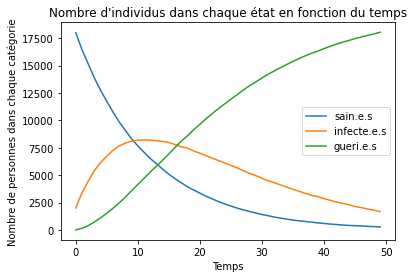

In [18]:
# T = 50
graphSIR(generated,50)

#### 2. Quand t est grand, quel est la proportion d’individus sains, infectés et guéris ?

In [27]:
def percentage(part, whole):
    """
    Fonction de pourcentage utilisé dans la fonction de proportion.
    *les parametres:
    part : 
    
    """
    return 100 * part/whole


In [28]:
def proportion(dic, t, whole):
    sains = percentage(dic[t-1]["S"],whole)
    infectes = percentage(dic[t-1]["I"],whole)
    gueris = percentage(dic[t-1]["R"],whole)
    print("Sains : ",sains, "% -- Infectés : ", infectes, "% -- Guéris : ", gueris, "%")

Pour T = 50 comme sur le sujet :

In [50]:
proportion(generated, 50, 20000)

Sains :  1.615 % -- Infectés :  8.085 % -- Guéris :  90.3 %


T est grand :
Nous prenons T = 500

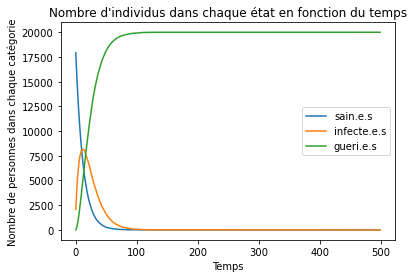

In [51]:
generatedTgrand = GenerateRandomPS(20000, 500, pi0, A)
graphSIR(generatedTgrand,500)

In [52]:
proportion(generatedTgrand, 500, 20000)

Sains :  0.0 % -- Infectés :  0.0 % -- Guéris :  100.0 %


### Pic de l’épidémie

#### Au pic de l’épidémie, combien d’individus sont infectés ? A quel temps se produit le pic ?

In [53]:
def dicPic(dic, t, state):
    # prend le dictionnaire et trouve le plus grand I avec son T correspondant 
    state_dic = {t:dic[t][state] for t in dic}
    max_value = max(state_dic.values())
    max_key = 0
    for key, value in state_dic.items():
        if max_value == value : 
            max_key = key
            break
    return {max_key : max_value}    

In [54]:
def pic(dic, t, state):

    max_infectes = dicPic(dic, t, state)
    cle = list(max_infectes.keys())
    valeur = list(max_infectes.values())
    temps = cle[0]
    nombre = valeur[0]
    print("Nombre d'invidus: ", nombre, "-- Le temps de production du pic : ", temps)

Nombre d'individus infectés et le temps du pic : 

In [55]:
pic(generated,50,"I")

Nombre d'invidus:  8202 -- Le temps de production du pic :  12


### Longueur de l’infection

#### 1. À partir des simulations, estimer la longueur moyenne d’une séquence de I

Moyenne pour un seul individu :

In [56]:
def moyenneInd(list_sequences, state):
    
    somme_seq = 0
    somme_list = 0
    
    for sequence in list_sequences: 
        somme_seq = sequence.count(state)
        somme_list += somme_seq
    
    return somme_list/len(list_sequences)


In [57]:
def generateManySequences(T, dist_proba_init, matrice_transition, number):

    list_seq = []
    for i in range(number):
        new_seq = generateRandomSequence(T, dist_proba_init, matrice_transition)
        list_seq.append(new_seq)
    return list_seq

In [58]:
listSq = generateManySequences(50, pi0, A, 100)
moyInd = moyenneInd(listSq, "I")
print("La longeur moyenne d'une séquence de I pour un individu est: ", moyInd)

La longeur moyenne d'une séquence de I pour un individu est:  12.21


Moyenne pour toute la population en fonction du temps : 

In [59]:
def moyennePop(dic, t, state):
    stateList = [dic[t][state] for t in dic]
    return sum(stateList)/len(stateList)

In [60]:
moyPop = moyennePop(generated,50,"I")
print("La longeur moyenne d'une séquence de I dans la population est: ", moyPop)

La longeur moyenne d'une séquence de I dans la population est:  5108.8


#### 2. Calculer théoriquement la longueur d’une séquence de I en fonction de la probabilité de rester infecté, si on est infecté au temps précédent (vous pourrez utiliser l’espérance de la loi géométrique)

## 2 Modèle ergodique

#### 1. Créez la nouvelle matrice de transition, et les nouvelles simulations, comment la population évoluet-elle si un individu guérit peut redevenir infecté ?

In [24]:
A1 = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.04,0,0.96]])
print(A1)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.04 0.   0.96]]


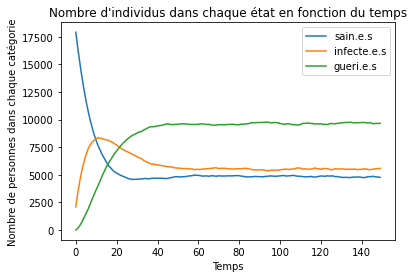

In [62]:
ergoDic = GenerateRandomPS(20000, 150, pi0, A1)
graphSIR(ergoDic, 150)

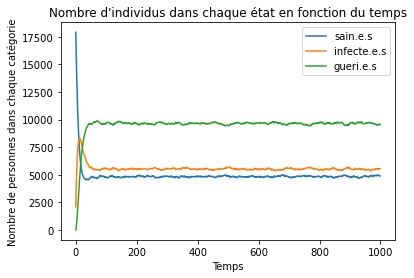

In [63]:
ergoDicGrand = GenerateRandomPS(20000, 1000, pi0, A1)
graphSIR(ergoDicGrand, 1000)

#### 2. Refaire les simulations avec une autre distribution de probabilité initiale, par exemple si au temps t = 0, nous avons 90% d’infectés et 10% de sains. Explorez d’autres initialisations et commentez vos observations.

In [21]:
pi0_new = [0.1, 0.9, 0]
print(pi0_new)

[0.1, 0.9, 0]


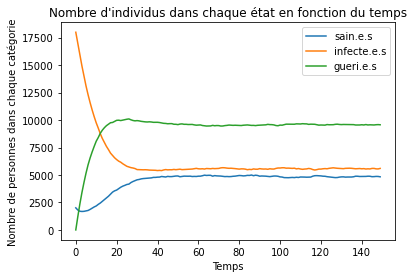

In [65]:
ergoDic_new = GenerateRandomPS(20000, 150, pi0_new, A1)
graphSIR(ergoDic_new, 150)

In [22]:
def randomInitialisations(number,pop,t):
    
    for i in range(number):    
        s = np.random.rand()
        i = np.random.rand()
        r = np.random.rand()
        pi0_random = [s, i, r]
        print ("Pour une distribution initial de ", s*100, "% sains, ", i*100, "% infectés et ", r*100, "% guéris")
        ergoDic_random = GenerateRandomPS(pop, t, pi0_random, A1)
        graphSIR(ergoDic_random, t)
        proportion(ergoDic_random, t, pop)
    

Pour une distribution initial de  88.04819368856539 % sains,  27.039711752157537 % infectés et  4.04972272551456 % guéris


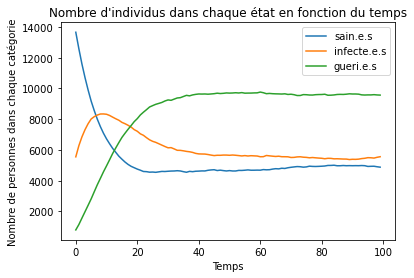

Sains :  24.39 % -- Infectés :  27.785 % -- Guéris :  47.825 %
Pour une distribution initial de  56.19534033691815 % sains,  51.3550100784779 % infectés et  88.46572813583452 % guéris


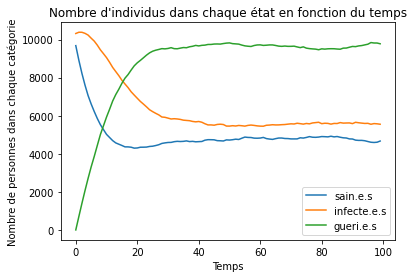

Sains :  23.345 % -- Infectés :  27.76 % -- Guéris :  48.895 %
Pour une distribution initial de  67.54757515271737 % sains,  52.91722449258036 % infectés et  17.096778157490398 % guéris


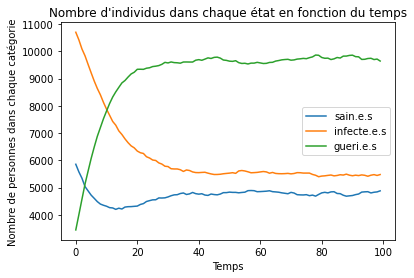

Sains :  24.4 % -- Infectés :  27.39 % -- Guéris :  48.21 %
Pour une distribution initial de  44.772645851964796 % sains,  31.38029091892962 % infectés et  2.935894488995272 % guéris


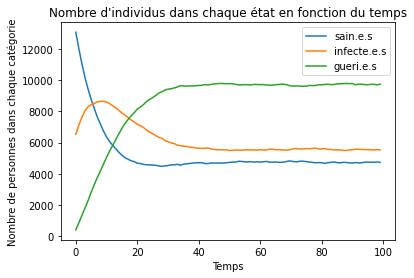

Sains :  23.625 % -- Infectés :  27.635 % -- Guéris :  48.74 %
Pour une distribution initial de  13.531879368430367 % sains,  94.07358314025734 % infectés et  4.362297597035624 % guéris


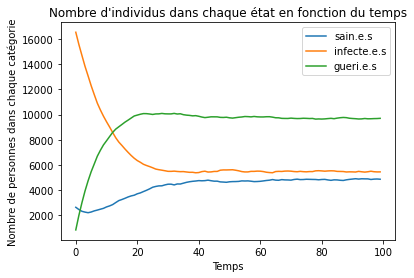

Sains :  24.3 % -- Infectés :  27.22 % -- Guéris :  48.48 %


In [29]:
randomInitialisations(5,20000,100)

Nous pouvons toujours constater que les courbes se convergent vers les meme valeurs constantes meme si les distributions changent.

#### 3. Quels est la nature des états de cette chaine de Markov ? Est-elle périodique ? Est-elle irréductible ?

Une chaine de Markov est ergodique si et seulement si elle est irréductible,
apériodique et récurente positive.

#### 4. Calculer la distribution de probabilité stationnaire à partir de la matrice de transition et comparez ce résultat avec les simulations pour t assez grand.


## 3 Modification du modèle : confinement

#### 1. Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir infecté ? Modifiez le premier modèle pour créer une nouvelle matrice des probabilités de transitions A2, et comparer les simulations au premier modèle.

In [3]:
A2 = np.array([[0.98,0.02,0],[0,0.93,0.07],[0,0,1]])
print(A2)

[[0.98 0.02 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


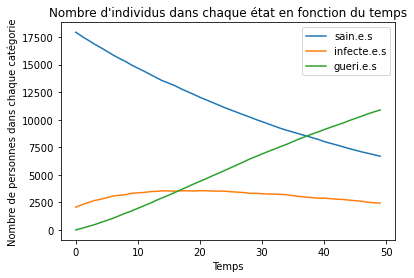

In [26]:
confinementDic = GenerateRandomPS(20000, 50, pi0, A2)
graphSIR(confinementDic, 50)

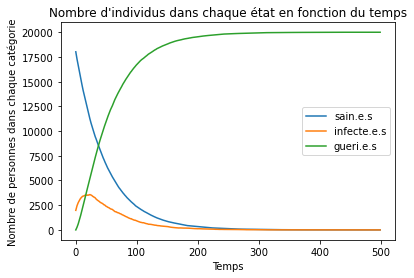

In [30]:
confinementDicGrand = GenerateRandomPS(20000, 500, pi0, A2)
graphSIR(confinementDicGrand, 500)

#### 2. Maintenant nous allons alterner entre les périodes de non distanciation et de distanciation.

In [31]:
pi0_conf = [1, 0, 0]

In [39]:
def GenerateRandomPSConf(population, t, dist_proba_init, matrice_transition_deconf, matrice_transition_conf):
    """
    Generate Random Population Sequences Confinement
    Génére des séquences aléatoires de taille T sur toute la population en utilisant le GenerateRandomSequence
    
    *les parametres:
     population : le nombre d'invididus dans une population; int .
     t : la longeur de la chaine générer pour une sequence ET le temps; int .
     dist_proba_init : la distribition de la probablité initiale; tab[float] .
     matrice_transition : la matrice contenant les probabilités de transition entre les différents états; tab[float][float] .
     
     *le return : 
     Retourne un dictionnnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé
     correspont a l'etat (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R ;  dict[int: dict[str:int]] .

    
    
    """
    
    # Nous prenons t comme la longeur de la sequence ainsi que le temps parceque chaque etat de la sequence 
    # correspond a un temps qui est égale a son index dans la chaine . 
    
    random_sequence = "" # Initalisation de la sequence vide, nous allons generer dedans chaque
                        # sequence afin de l'inserer dans le dictionnaire du return .

    # Initialisation du dictionnaire des états dict[int : dict[str:int]] .
    states = dict()  
    for i in range(t): 
        states[i] = {"S":0, "I":0, "R":0} 

        
    # Pour chaque individu de la population proposé, nous appliquons la fonction generateRandomSequence pour lui génerer
    # une séquence d'état aléatoire de taille T qui se base sur la distribution initial et la matrice des transitions
    # après nous vérifiant pour chaque caractere de la sequence générer l'état qui la correspond
    # afin d'incrémenter son compteur correspondant qui correspond au nombre d'invidus dans l'état trouvé .
    
    confinement = False


    
    for individu in range(population): 
        I = [states[x]["I"] for x in states]
        perc = percentage(sum(I),population)
        print(perc)
        if perc >= 30 :
            confinement = True
            random_sequence = generateRandomSequence(t, dist_proba_init, matrice_transition_conf)
            
        elif (perc < 15) and (confinement):
            confinement = False
            random_sequence = generateRandomSequence(t, dist_proba_init, matrice_transition_deconf) 
            
        elif (perc >= 15) and (confinement):
            random_sequence = generateRandomSequence(t, dist_proba_init, matrice_transition_conf)
            
        else:
            random_sequence = generateRandomSequence(t, dist_proba_init, matrice_transition_deconf) 
            
        for etat_i in range(len(random_sequence)): 
            if random_sequence[etat_i] == "S": 
                states[etat_i]["S"] += 1 
            elif random_sequence[etat_i] == "I": 
                states[etat_i]["I"] += 1 
            else:
                if random_sequence[etat_i] == "R": 
                    states[etat_i]["R"] += 1 
    
    return states


0.0
0.165
0.305
0.32
0.35
0.375
0.38
0.62
0.635
0.825
1.025
1.135
1.17
1.23
1.34
1.37
1.555
1.56
1.625
1.665
1.77
1.855
1.9
1.905
1.94
2.0
2.02
2.135
2.185
2.305
2.375
2.575
2.68
2.745
2.755
2.785
2.87
2.88
2.9
3.005
3.1
3.125
3.24
3.36
3.39
3.435
3.535
3.575
3.735
3.84
3.86
3.88
3.905
4.055
4.075
4.12
4.145
4.155
4.3
4.315
4.43
4.435
4.455
4.555
4.615
4.705
4.73
4.765
4.775
4.8
4.805
4.91
4.995
5.125
5.15
5.18
5.27
5.345
5.405
5.445
5.565
5.57
5.7
5.795
5.855
5.885
6.06
6.07
6.18
6.205
6.21
6.285
6.335
6.415
6.43
6.435
6.48
6.5
6.535
6.57
6.625
6.73
6.74
6.88
6.9
6.92
6.93
6.985
7.07
7.095
7.25
7.33
7.475
7.7
7.82
7.83
7.87
7.94
8.14
8.29
8.32
8.465
8.59
8.625
8.71
8.72
8.775
8.78
8.815
8.9
8.915
8.98
9.005
9.07
9.075
9.125
9.2
9.32
9.4
9.525
9.75
9.755
9.755
9.76
9.78
9.86
9.87
10.055
10.145
10.225
10.31
10.31
10.345
10.585
10.62
10.625
10.64
10.665
10.83
10.95
11.08
11.25
11.265
11.27
11.285
11.3
11.375
11.44
11.465
11.605
11.64
11.65
11.68
11.835
11.845
11.885
11.9
12.045
12.145
12

63.98
64.005
64.005
64.145
64.16
64.16
64.16
64.22
64.25
64.315
64.32
64.475
64.475
64.5
64.5
64.565
64.565
64.59
64.59
64.59
64.65
64.73
64.78
64.825
64.855
64.855
64.855
64.855
64.855
64.895
64.93
65.035
65.11
65.11
65.155
65.16
65.16
65.23
65.23
65.435
65.435
65.435
65.45
65.505
65.505
65.505
65.545
65.545
65.585
65.68
65.68
65.68
65.68
65.685
65.685
65.735
65.87
65.87
65.885
65.9
66.01
66.065
66.09
66.095
66.095
66.155
66.175
66.175
66.285
66.395
66.395
66.565
66.605
66.775
66.82
66.885
66.995
67.205
67.205
67.205
67.24
67.24
67.25
67.29
67.445
67.445
67.485
67.56
67.56
67.56
67.56
67.56
67.565
67.565
67.58
67.61
67.63
67.64
67.64
67.65
67.74
67.745
67.905
67.905
67.925
67.925
67.925
67.925
68.02
68.08
68.15
68.15
68.16
68.18
68.25
68.295
68.34
68.46
68.595
68.61
68.635
68.635
68.68
68.68
68.7
68.82
68.905
68.92
68.97
68.97
69.105
69.21
69.21
69.295
69.295
69.295
69.295
69.315
69.34
69.35
69.54
69.59
69.59
69.685
69.725
69.845
69.875
69.915
70.05
70.125
70.2
70.39
70.475
70.55
70.5

111.65
111.69
111.73
111.73
111.83
111.83
111.945
111.945
111.945
111.945
111.99
111.995
112.02
112.04
112.075
112.075
112.13
112.14
112.14
112.145
112.165
112.235
112.3
112.435
112.455
112.515
112.515
112.595
112.68
112.68
112.715
112.715
112.715
112.72
112.72
112.85
112.87
112.875
112.97
113.025
113.025
113.025
113.025
113.09
113.09
113.14
113.16
113.16
113.16
113.205
113.29
113.29
113.29
113.31
113.31
113.335
113.335
113.34
113.425
113.425
113.56
113.58
113.66
113.66
113.67
113.67
113.7
113.7
113.82
113.85
113.85
113.895
113.895
113.895
113.895
113.895
113.94
113.985
114.015
114.015
114.03
114.03
114.075
114.085
114.16
114.16
114.165
114.165
114.22
114.26
114.26
114.42
114.43
114.465
114.495
114.495
114.495
114.565
114.565
114.565
114.585
114.59
114.595
114.71
114.76
114.76
114.76
114.77
114.785
115.02
115.02
115.02
115.02
115.035
115.075
115.075
115.255
115.36
115.36
115.36
115.41
115.43
115.45
115.45
115.465
115.5
115.5
115.525
115.525
115.525
115.525
115.565
115.59
115.59
115.59


153.035
153.035
153.16
153.345
153.385
153.385
153.49
153.535
153.585
153.595
153.595
153.615
153.7
153.74
153.845
153.845
153.955
153.955
154.115
154.175
154.355
154.4
154.4
154.445
154.545
154.575
154.605
154.62
154.62
154.695
154.815
154.815
154.82
154.82
154.82
154.82
154.875
154.875
154.88
154.88
154.985
154.985
154.985
154.985
155.09
155.09
155.12
155.145
155.175
155.175
155.265
155.27
155.31
155.31
155.425
155.485
155.495
155.55
155.6
155.615
155.615
155.625
155.625
155.625
155.655
155.655
155.67
155.68
155.68
155.68
155.68
155.755
155.755
155.81
155.875
155.88
155.895
155.91
155.91
155.94
155.94
155.95
155.99
156.01
156.135
156.225
156.225
156.305
156.33
156.445
156.46
156.46
156.5
156.5
156.5
156.52
156.58
156.64
156.655
156.7
156.7
156.71
156.79
156.84
156.885
156.89
156.905
156.94
156.945
156.945
156.97
157.05
157.05
157.06
157.11
157.245
157.255
157.255
157.35
157.37
157.48
157.495
157.515
157.54
157.565
157.565
157.605
157.64
157.64
157.66
157.66
157.7
157.76
157.765
157.8

193.015
193.015
193.05
193.09
193.09
193.12
193.175
193.19
193.345
193.39
193.42
193.425
193.425
193.425
193.425
193.425
193.425
193.455
193.455
193.455
193.455
193.455
193.455
193.575
193.675
193.75
193.75
193.75
193.845
193.895
193.9
193.91
193.95
193.95
194.015
194.215
194.215
194.345
194.345
194.37
194.41
194.45
194.495
194.495
194.495
194.495
194.7
194.73
194.73
194.73
194.73
194.73
194.77
194.77
194.77
194.77
194.78
194.78
194.78
194.805
194.89
194.89
194.89
194.905
194.905
194.94
194.955
194.97
194.97
194.975
194.975
195.05
195.08
195.085
195.09
195.09
195.14
195.14
195.21
195.235
195.235
195.245
195.245
195.405
195.455
195.525
195.665
195.665
195.665
195.745
195.77
195.795
195.845
195.85
195.925
195.955
196.135
196.155
196.155
196.155
196.155
196.155
196.19
196.315
196.42
196.44
196.48
196.48
196.56
196.56
196.62
196.655
196.785
196.805
196.82
196.835
196.845
196.845
196.895
196.895
196.895
196.955
197.16
197.2
197.21
197.255
197.255
197.34
197.38
197.38
197.405
197.405
197.415

234.325
234.325
234.325
234.325
234.39
234.39
234.42
234.485
234.52
234.52
234.58
234.58
234.61
234.655
234.73
234.825
234.835
234.865
234.865
234.9
234.9
235.005
235.005
235.065
235.1
235.19
235.225
235.245
235.265
235.275
235.385
235.455
235.475
235.6
235.68
235.695
235.77
235.815
235.835
235.835
235.945
236.095
236.175
236.215
236.24
236.3
236.335
236.335
236.335
236.335
236.34
236.345
236.345
236.44
236.455
236.48
236.48
236.495
236.605
236.605
236.63
236.71
236.715
236.715
236.755
236.76
236.81
236.81
236.81
236.81
236.815
236.815
236.815
236.9
236.955
236.975
236.975
237.095
237.135
237.23
237.315
237.315
237.335
237.335
237.335
237.38
237.445
237.575
237.64
237.645
237.72
237.86
237.86
237.88
237.91
237.91
237.925
237.96
237.96
237.96
237.965
238.005
238.005
238.005
238.005
238.025
238.025
238.09
238.115
238.14
238.14
238.14
238.14
238.2
238.2
238.215
238.24
238.24
238.24
238.245
238.295
238.375
238.375
238.385
238.385
238.385
238.385
238.52
238.52
238.52
238.545
238.66
238.66
2

277.72
277.74
277.85
278.015
278.015
278.015
278.065
278.065
278.065
278.085
278.16
278.16
278.16
278.27
278.3
278.32
278.355
278.355
278.435
278.435
278.515
278.655
278.7
278.7
278.7
278.715
278.785
278.875
278.925
278.96
278.96
278.96
279.045
279.045
279.045
279.045
279.045
279.12
279.12
279.145
279.18
279.18
279.25
279.25
279.285
279.29
279.31
279.33
279.45
279.45
279.45
279.45
279.465
279.465
279.465
279.465
279.66
279.66
279.765
279.83
279.895
279.955
279.975
279.975
279.985
280.06
280.06
280.16
280.16
280.16
280.205
280.205
280.205
280.205
280.205
280.205
280.235
280.255
280.31
280.315
280.355
280.375
280.375
280.375
280.48
280.49
280.49
280.49
280.55
280.55
280.55
280.55
280.59
280.6
280.6
280.805
280.885
280.885
280.885
280.885
281.0
281.025
281.04
281.06
281.065
281.075
281.19
281.255
281.305
281.355
281.495
281.535
281.535
281.535
281.62
281.62
281.63
281.775
281.86
281.86
281.895
281.895
281.92
281.92
281.92
282.11
282.11
282.12
282.12
282.12
282.12
282.15
282.21
282.215
282

316.53
316.55
316.655
316.71
316.71
316.725
316.725
316.725
316.855
316.855
316.99
316.99
317.0
317.09
317.21
317.37
317.37
317.37
317.445
317.445
317.51
317.51
317.625
317.7
317.775
317.835
317.845
317.855
317.915
317.925
317.94
317.955
317.965
317.965
317.975
318.05
318.23
318.395
318.395
318.44
318.445
318.56
318.585
318.645
318.66
318.695
318.735
318.745
318.845
318.845
318.845
319.06
319.105
319.12
319.195
319.225
319.225
319.27
319.27
319.29
319.29
319.415
319.455
319.455
319.585
319.635
319.635
319.725
319.725
319.755
319.755
319.755
319.8
319.855
319.855
319.915
319.915
319.935
319.98
320.015
320.05
320.195
320.215
320.215
320.215
320.3
320.5
320.505
320.505
320.54
320.54
320.54
320.54
320.54
320.54
320.755
320.785
320.785
320.88
320.885
320.885
320.89
321.02
321.02
321.165
321.255
321.255
321.315
321.35
321.36
321.36
321.395
321.465
321.5
321.53
321.53
321.555
321.555
321.555
321.58
321.58
321.595
321.595
321.595
321.595
321.595
321.695
321.905
321.96
322.035
322.035
322.12
32

357.345
357.35
357.435
357.435
357.44
357.44
357.45
357.47
357.48
357.535
357.535
357.545
357.545
357.55
357.685
357.81
357.81
357.81
357.84
357.84
357.88
357.94
358.12
358.22
358.22
358.285
358.285
358.335
358.35
358.35
358.375
358.375
358.385
358.45
358.49
358.6
358.645
358.89
358.92
359.0
359.025
359.11
359.125
359.275
359.32
359.325
359.325
359.48
359.52
359.535
359.535
359.585
359.61
359.655
359.67
359.67
359.67
359.69
359.73
359.73
359.93
359.97
359.97
360.035
360.035
360.05
360.05
360.055
360.2
360.295
360.295
360.315
360.315
360.345
360.365
360.44
360.465
360.465
360.68
360.68
360.69
360.71
360.73
360.735
360.735
360.835
360.875
361.105
361.12
361.12
361.12
361.28
361.28
361.28
361.33
361.375
361.485
361.485
361.57
361.58
361.72
361.72
361.765
361.765
361.795
361.795
361.845
361.925
361.925
361.955
361.955
362.01
362.055
362.07
362.155
362.155
362.21
362.235
362.235
362.235
362.26
362.26
362.275
362.28
362.28
362.28
362.28
362.325
362.37
362.38
362.39
362.39
362.39
362.39
362.4

399.88
399.925
399.925
399.98
400.0
400.09
400.09
400.11
400.115
400.115
400.115
400.115
400.15
400.215
400.37
400.37
400.405
400.51
400.51
400.52
400.52
400.56
400.56
400.575
400.645
400.645
400.725
400.755
400.755
400.76
400.785
400.925
400.925
400.955
401.0
401.0
401.0
401.04
401.15
401.23
401.31
401.335
401.415
401.55
401.6
401.6
401.65
401.715
401.735
401.79
401.8
401.905
401.915
401.915
401.92
401.955
402.045
402.045
402.06
402.125
402.205
402.215
402.345
402.385
402.385
402.385
402.49
402.49
402.495
402.525
402.555
402.625
402.625
402.63
402.675
402.675
402.675
402.82
402.82
402.905
402.99
402.99
403.11
403.11
403.11
403.16
403.33
403.385
403.385
403.39
403.39
403.39
403.39
403.395
403.395
403.445
403.445
403.64
403.685
403.685
403.685
403.785
403.785
403.785
403.835
403.835
403.875
403.875
403.875
403.875
403.895
403.925
403.94
403.94
403.94
403.945
404.025
404.16
404.16
404.245
404.305
404.31
404.37
404.37
404.49
404.535
404.545
404.545
404.58
404.61
404.65
404.67
404.67
404.7

442.24
442.255
442.27
442.305
442.47
442.485
442.485
442.57
442.57
442.57
442.575
442.585
442.585
442.61
442.63
442.63
442.64
442.64
442.645
442.655
442.655
442.66
442.825
442.92
442.955
443.02
443.12
443.12
443.215
443.27
443.27
443.27
443.33
443.33
443.33
443.41
443.41
443.42
443.455
443.46
443.46
443.575
443.615
443.615
443.615
443.615
443.615
443.615
443.615
443.615
443.69
443.75
443.75
443.795
443.795
443.81
443.86
444.0
444.125
444.19
444.19
444.225
444.25
444.345
444.345
444.355
444.37
444.515
444.515
444.515
444.515
444.515
444.525
444.535
444.535
444.55
444.6
444.6
444.625
444.625
444.685
444.8
444.8
444.875
444.95
445.005
445.005
445.005
445.04
445.13
445.13
445.13
445.155
445.205
445.245
445.275
445.275
445.275
445.275
445.38
445.495
445.495
445.505
445.55
445.55
445.56
445.61
445.625
445.685
445.685
445.685
445.685
445.685
445.74
445.775
445.865
445.915
445.915
445.915
445.935
446.06
446.085
446.085
446.14
446.16
446.16
446.17
446.22
446.265
446.265
446.305
446.305
446.305


481.115
481.145
481.21
481.21
481.235
481.235
481.235
481.235
481.27
481.275
481.275
481.275
481.275
481.345
481.405
481.405
481.425
481.44
481.58
481.58
481.605
481.61
481.62
481.675
481.715
481.725
481.725
481.825
481.835
481.835
481.855
481.88
481.88
481.88
481.88
481.88
481.91
481.91
481.925
481.96
481.96
482.11
482.24
482.245
482.245
482.26
482.34
482.34
482.35
482.405
482.405
482.47
482.475
482.51
482.535
482.57
482.69
482.69
482.69
482.71
482.77
482.84
482.84
482.91
482.965
482.965
482.98
482.99
482.99
483.05
483.065
483.065
483.065
483.12
483.12
483.12
483.16
483.17
483.17
483.17
483.17
483.17
483.175
483.175
483.2
483.2
483.2
483.2
483.285
483.285
483.285
483.34
483.34
483.34
483.355
483.355
483.515
483.55
483.605
483.615
483.615
483.615
483.615
483.625
483.7
483.76
483.85
483.86
483.93
483.935
483.955
483.955
483.955
483.98
484.0
484.08
484.15
484.15
484.17
484.22
484.235
484.235
484.255
484.3
484.3
484.33
484.42
484.445
484.47
484.575
484.575
484.575
484.575
484.585
484.61
4

523.73
523.755
523.755
523.755
523.815
523.855
523.855
523.93
523.93
524.075
524.075
524.165
524.165
524.275
524.415
524.54
524.54
524.54
524.63
524.65
524.65
524.655
524.655
524.76
524.825
524.91
524.95
524.95
524.995
524.995
525.05
525.05
525.095
525.095
525.095
525.12
525.16
525.165
525.34
525.34
525.34
525.405
525.47
525.47
525.51
525.51
525.55
525.55
525.67
525.725
525.805
525.815
525.815
525.855
525.94
525.96
525.96
526.11
526.11
526.11
526.14
526.185
526.23
526.23
526.33
526.42
526.45
526.485
526.505
526.505
526.505
526.51
526.56
526.56
526.56
526.59
526.59
526.59
526.59
526.61
526.705
526.735
526.795
526.795
526.795
526.81
526.85
526.85
526.935
526.935
526.98
526.98
526.98
526.98
526.98
526.985
527.01
527.01
527.01
527.01
527.075
527.155
527.22
527.275
527.31
527.31
527.33
527.33
527.375
527.42
527.435
527.54
527.56
527.56
527.56
527.59
527.6
527.825
527.825
527.825
527.825
527.825
527.83
527.855
528.045
528.055
528.12
528.12
528.12
528.145
528.205
528.285
528.36
528.36
528.36


563.855
563.86
564.06
564.06
564.06
564.09
564.12
564.18
564.18
564.26
564.26
564.26
564.34
564.37
564.46
564.46
564.48
564.525
564.525
564.525
564.585
564.66
564.715
564.715
564.85
564.85
564.915
564.95
564.95
565.015
565.015
565.155
565.155
565.175
565.355
565.42
565.445
565.445
565.445
565.52
565.52
565.52
565.52
565.63
565.63
565.63
565.675
565.715
565.72
565.725
565.725
565.74
565.755
565.755
565.755
565.785
565.825
565.825
565.825
565.835
565.885
565.885
565.885
565.94
565.98
566.025
566.055
566.06
566.06
566.095
566.115
566.19
566.19
566.23
566.275
566.275
566.35
566.37
566.39
566.425
566.425
566.425
566.44
566.44
566.46
566.48
566.48
566.48
566.6
566.6
566.67
566.74
566.77
566.77
566.77
566.77
566.77
566.77
566.78
566.78
566.78
566.785
566.85
566.96
567.025
567.115
567.115
567.135
567.14
567.16
567.32
567.32
567.42
567.425
567.425
567.475
567.475
567.475
567.48
567.52
567.55
567.6
567.605
567.64
567.67
567.685
567.685
567.685
567.805
567.835
567.85
567.865
567.865
567.92
568.03

601.645
601.72
601.72
601.73
601.74
601.765
601.765
601.765
601.765
602.0
602.0
602.005
602.005
602.03
602.17
602.17
602.19
602.19
602.225
602.235
602.235
602.235
602.245
602.245
602.245
602.42
602.54
602.695
602.735
602.735
602.735
602.78
602.845
602.93
602.93
602.93
603.01
603.05
603.085
603.085
603.095
603.125
603.2
603.2
603.285
603.295
603.46
603.52
603.52
603.555
603.61
603.64
603.64
603.64
603.64
603.65
603.65
603.65
603.68
603.68
603.715
603.73
603.76
603.76
603.84
603.86
603.945
603.945
604.02
604.035
604.035
604.165
604.165
604.165
604.2
604.24
604.275
604.43
604.465
604.465
604.54
604.54
604.54
604.645
604.65
604.74
604.8
604.825
605.02
605.08
605.08
605.2
605.35
605.375
605.375
605.51
605.52
605.54
605.71
605.755
605.755
605.785
605.86
605.92
605.955
605.98
606.04
606.04
606.09
606.16
606.2
606.28
606.28
606.37
606.385
606.42
606.555
606.57
606.59
606.69
606.745
606.865
606.865
606.885
606.895
606.92
606.955
606.97
606.975
606.975
607.07
607.085
607.19
607.19
607.2
607.24
6

644.56
644.56
644.56
644.61
644.705
644.705
644.705
644.885
645.005
645.005
645.005
645.045
645.06
645.06
645.14
645.195
645.255
645.265
645.35
645.425
645.425
645.55
645.565
645.58
645.64
645.64
645.835
645.84
645.84
645.845
645.865
645.87
645.885
645.935
645.94
645.94
645.945
645.945
645.975
646.015
646.015
646.015
646.095
646.095
646.235
646.32
646.32
646.49
646.5
646.5
646.5
646.59
646.59
646.655
646.7
646.7
646.73
646.74
646.76
646.76
646.76
646.76
646.78
646.78
646.805
646.805
646.805
646.86
646.86
647.0
647.03
647.03
647.03
647.045
647.045
647.045
647.075
647.075
647.075
647.075
647.075
647.085
647.085
647.1
647.27
647.285
647.465
647.5
647.555
647.595
647.665
647.72
647.725
647.725
647.725
647.725
647.725
647.8
647.8
647.8
647.82
647.92
647.945
648.01
648.01
648.01
648.235
648.235
648.235
648.235
648.235
648.245
648.29
648.355
648.355
648.355
648.36
648.36
648.365
648.44
648.44
648.44
648.44
648.45
648.475
648.475
648.475
648.535
648.535
648.575
648.575
648.595
648.595
648.595


683.695
683.735
683.765
683.805
683.805
683.83
683.995
683.995
684.045
684.12
684.145
684.145
684.175
684.325
684.365
684.395
684.395
684.44
684.44
684.44
684.515
684.55
684.57
684.57
684.57
684.705
684.75
684.76
684.81
684.81
684.875
685.075
685.075
685.09
685.145
685.175
685.175
685.175
685.2
685.2
685.205
685.255
685.29
685.305
685.32
685.32
685.34
685.37
685.455
685.455
685.455
685.47
685.47
685.47
685.475
685.54
685.55
685.55
685.65
685.745
685.795
685.795
685.845
685.845
685.89
685.89
685.945
686.15
686.155
686.155
686.255
686.275
686.355
686.42
686.42
686.505
686.535
686.535
686.57
686.615
686.615
686.655
686.655
686.655
686.665
686.665
686.665
686.68
686.7
686.7
686.7
686.7
686.745
686.745
686.825
686.845
686.845
686.895
686.895
686.93
687.02
687.045
687.085
687.085
687.165
687.245
687.245
687.3
687.325
687.47
687.485
687.545
687.595
687.695
687.735
687.74
687.74
687.775
687.775
687.78
687.835
687.975
687.975
687.975
687.975
688.07
688.175
688.175
688.175
688.2
688.22
688.335
6

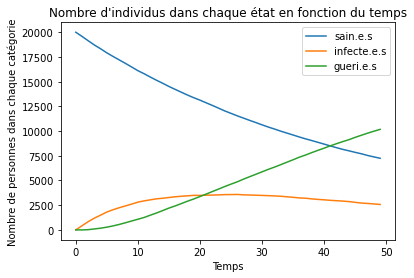

In [40]:
confDic = GenerateRandomPSConf(20000, 50, pi0_conf, A, A2)
graphSIR(confDic, 50)